In [1]:
import pandas as pd
import numpy as np


In [4]:
# Load the data
data = pd.read_csv('/content/drive/MyDrive/Business Analytics /CreditCard (1).csv')

In [5]:
# Print the shape of the dataset
print("Shape of the dataset:", data.shape)

Shape of the dataset: (1319, 12)


In [6]:
# Describe the data
print(data.describe())

           reports          age       income        share  expenditure  \
count  1319.000000  1319.000000  1319.000000  1319.000000  1319.000000   
mean      0.456406    33.213103     3.365376     0.068732   185.057071   
std       1.345267    10.142783     1.693902     0.094656   272.218917   
min       0.000000     0.166667     0.210000     0.000109     0.000000   
25%       0.000000    25.416670     2.243750     0.002316     4.583333   
50%       0.000000    31.250000     2.900000     0.038827   101.298300   
75%       0.000000    39.416670     4.000000     0.093617   249.035800   
max      14.000000    83.500000    13.500000     0.906320  3099.505000   

        dependents       months   majorcards       active  
count  1319.000000  1319.000000  1319.000000  1319.000000  
mean      0.993935    55.267627     0.817286     6.996967  
std       1.247745    66.271746     0.386579     6.305812  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000    12.000000  

In [7]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64


In [8]:
# Identify categorical variables
categorical_vars = ['owner', 'selfemp', 'card']

In [9]:
# Convert categorical variables to numerical
data['owner'] = data['owner'].map({'yes': 1, 'no': 0})
data['selfemp'] = data['selfemp'].map({'yes': 1, 'no': 0})
data['card'] = data['card'].map({'yes': 1, 'no': 0})

In [10]:
# Check for any necessary row/column removal
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   int64  
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   int64  
 7   selfemp      1319 non-null   int64  
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 123.8 KB
None


In [14]:
# Handle missing values (if any)
if data.isnull().sum().any():
  data = data.fillna(value)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Set style for seaborn
sns.set(style="whitegrid")

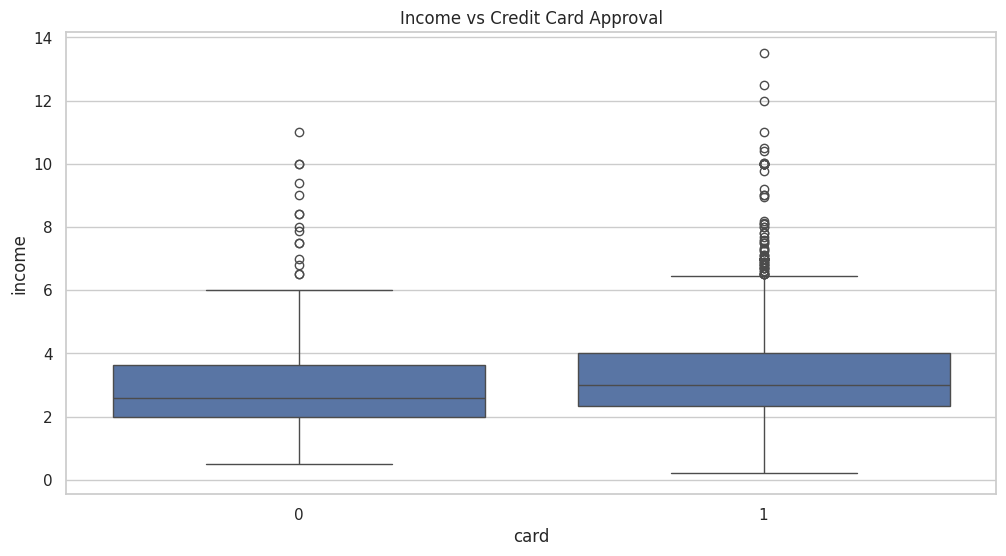

In [17]:
# Plotting income vs. approval
plt.figure(figsize=(12, 6))
sns.boxplot(x='card', y='income', data=data)
plt.title('Income vs Credit Card Approval')
plt.show()

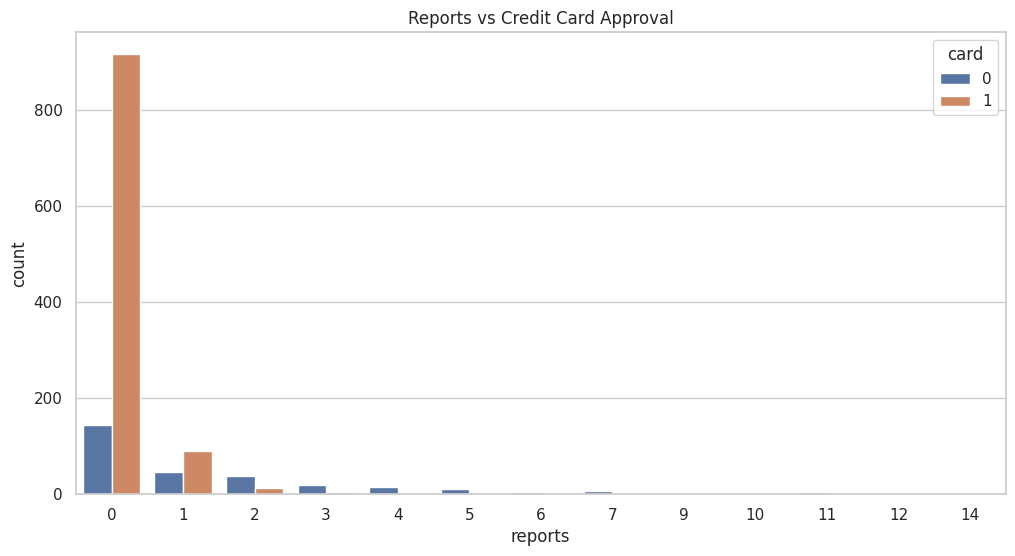

In [18]:
# Plotting reports vs. approval
plt.figure(figsize=(12, 6))
sns.countplot(x='reports', hue='card', data=data)
plt.title('Reports vs Credit Card Approval')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [20]:
# Isolate the variables
X = data.drop('card', axis=1)  # Independent variables
y = data['card']                # Dependent variable

In [21]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Create the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
import seaborn as sns

In [24]:
# Predictions
y_pred = model.predict(X_test)

In [25]:
# Create DataFrame to show predictions
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results_df)

      Actual  Predicted
677        1          1
1046       1          1
610        1          1
49         1          1
1284       1          1
...      ...        ...
1176       1          1
1002       1          1
1159       1          1
542        0          0
170        0          0

[264 rows x 2 columns]


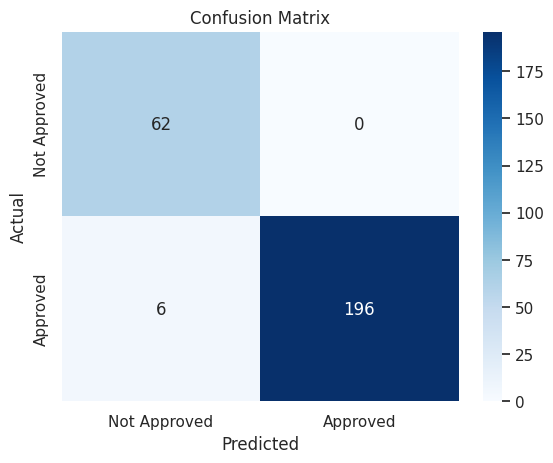

In [26]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [28]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.98
Recall: 0.97
F1 Score: 0.98


In [29]:
import statsmodels.api as sm

In [30]:
# Adding a constant for the intercept
X_sm = sm.add_constant(X_train)

In [33]:
# Fit the logistic regression model with L1 regularization
logit_model = sm.Logit(y_train, X_sm)
result = logit_model.fit_regularized(method='l1') # Using L1 regularization

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.04015384466385191
            Iterations: 110
            Function evaluations: 123
            Gradient evaluations: 110


In [34]:
# Print the summary
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                   card   No. Observations:                 1055
Model:                          Logit   Df Residuals:                     1043
Method:                           MLE   Df Model:                           11
Date:                Sun, 27 Oct 2024   Pseudo R-squ.:                  0.9241
Time:                        14:43:52   Log-Likelihood:                -42.362
converged:                       True   LL-Null:                       -558.28
Covariance Type:            nonrobust   LLR p-value:                2.693e-214
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.4983      2.873     -1.218      0.223      -9.129       2.132
reports        -1.9238      0.965     -1.993      0.046      -3.816      -0.032
age             0.0496      0.026      1.905    

In [35]:
# Prepare the test set
X_test_sm = sm.add_constant(X_test)

In [36]:
# Predictions
y_pred_sm = (result.predict(X_test_sm) >= 0.5).astype(int)

In [37]:
# Calculate metrics
accuracy_sm = accuracy_score(y_test, y_pred_sm)
recall_sm = recall_score(y_test, y_pred_sm)
f1_sm = f1_score(y_test, y_pred_sm)

In [38]:
print(f"Statsmodels Accuracy: {accuracy_sm:.2f}")
print(f"Statsmodels Recall: {recall_sm:.2f}")
print(f"Statsmodels F1 Score: {f1_sm:.2f}")

Statsmodels Accuracy: 0.98
Statsmodels Recall: 0.97
Statsmodels F1 Score: 0.98


In [39]:
print("Comparison of Models:")
print(f"Sklearn Accuracy: {accuracy:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")
print(f"Statsmodels Accuracy: {accuracy_sm:.2f}, Recall: {recall_sm:.2f}, F1 Score: {f1_sm:.2f}")

Comparison of Models:
Sklearn Accuracy: 0.98, Recall: 0.97, F1 Score: 0.98
Statsmodels Accuracy: 0.98, Recall: 0.97, F1 Score: 0.98
